<a href="https://colab.research.google.com/github/uncleben006/codelab/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
import pandas as pd
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.to_csv('iris.csv', encoding='utf-8',index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
from sklearn.model_selection import train_test_split
# train_test_split 帶入參數 （ 所有特徵, target, 幾％當訓練data）
# 會轉換成 (特徵90％,特徵10％,目標90％,目標10％)
x_train, x_test, y_train, y_test =  train_test_split( df.drop(['target'],axis=1), df['target'], test_size=0.1 )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


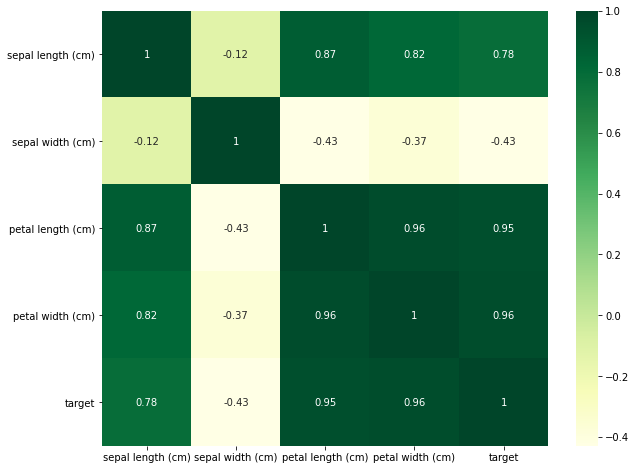

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,8))
# 帶入相關係數的矩陣作為參數
sns.heatmap(df.astype('float').corr(), annot=True, cmap='YlGn'  )

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
# Compute pairwise correlation of columns, excluding NA/null values.
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

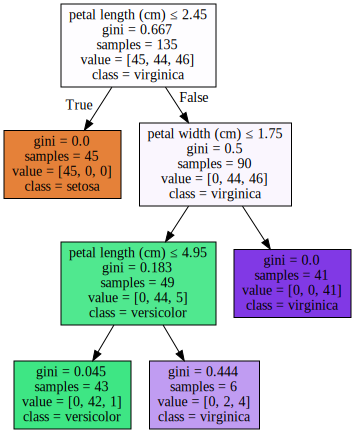

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(clf, out_file=None, feature_names=df.drop(['target'],axis=1).columns,
                    class_names=iris["target_names"], filled=True, special_characters=True )
                    
graph = graphviz.Source(g)
graph

In [ ]:
pre = clf.predict(x_test)
print('預測結果: ',list(pre))
print('真正標籤: ',list(y_test))

預測結果:  [0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1]
真正標籤:  [0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1]


In [ ]:
from sklearn.metrics import accuracy_score
print('預測成功機率: ',accuracy_score(y_test,pre))

預測成功機率:  0.9333333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

,0,1,2
0,5,0,0
1,0,5,1
2,0,0,4
